In [48]:
pip install pandas

In [49]:
pip install requests

In [50]:
pip install torchmetrics #모델 평가를 위한 패키지

In [51]:
pip install tensorboard

In [52]:
import torch
import pandas as pd
import torch.nn as nn
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torchvision.datasets import mnist
import requests
import torchmetrics
from torch.utils.tensorboard import SummaryWriter

In [53]:
#2차원 형태의 텐서 생성
print(torch.tensor( [ [1,2],[3,4] ] ))

tensor([[1, 2],
        [3, 4]])


In [54]:
#GPU에 텐서 생성
print(torch.tensor( [[1,2],[3,4]], device='cuda:0' ))

tensor([[1, 2],
        [3, 4]], device='cuda:0')


In [55]:
#dtype를 이용하여 텐서 생성
print(torch.tensor( [[1,2],[3,4]], dtype=torch.float64 ))

tensor([[1., 2.],
        [3., 4.]], dtype=torch.float64)


In [56]:
#텐서를 ndarray로 변환
temp = torch.tensor([[1,2],[3,4]])
print(temp.numpy())

temp = torch.tensor([[1,2],[3,4]])
print(temp.to("cpu").numpy())

[[1 2]
 [3 4]]
[[1 2]
 [3 4]]


In [57]:
#텐서의 인덱스 조작
temp = torch.FloatTensor([1,2,3,4,5,6,7]) #파이토치로 1차원 벡터 생성
print(temp[0], temp[1], temp[-1])
print(temp[0:2], temp[::2])

tensor(1.) tensor(2.) tensor(7.)
tensor([1., 2.]) tensor([1., 3., 5., 7.])


In [58]:
#텐서 연산
v = torch.tensor( [1,2,3] )
w = torch.tensor( [4,5,6] )
print( w-v ) #길이가 같은 벡터기에 연산 가능

tensor([3, 3, 3])


In [59]:
#텐서 차원 조작
temp = torch.tensor( [[1,2],[3,4]] )
print( temp.shape )
print('-------------------')
print( temp.view(4, 1) ) #2x2 행렬을 4x1로 변형
print('-------------------')
print( temp.view(-1) ) #1차원 벡터로 변형
print('-------------------')
print( temp.view(1,-1) ) #(1,?)와 같은 의미. 물음표는 다른 차원으로부터 해당 값을 유추. 즉, 원소개수(2x2=4)를 유지한 채 (1,?)의 형태를 만족해야 하므로 (1,4)가 됨
print('-------------------')
print( temp.view(-1,1)) #(4,1)로 변형

torch.Size([2, 2])
-------------------
tensor([[1],
        [2],
        [3],
        [4]])
-------------------
tensor([1, 2, 3, 4])
-------------------
tensor([[1, 2, 3, 4]])
-------------------
tensor([[1],
        [2],
        [3],
        [4]])


# **모델 정의**


  - 계층(layer) : 모듈 또는 모듈을 구성하는 한 개의 계층 (ex: 합성곱층, 선형계층 등)
  - 모듈(module) : 한 개 이상의 계층이 모여 구성된 것으로, 모듈이 모여 새로운 모듈을 만들 수도 있음
  - 모델(model) : 최종적으로 원하는 네트워크. 한 개의 모듈이 모델이 될 수도 있음


---


-파이토치에서 모델을 정의하기 위해서는 모듈(module)을 상속한 클래스를 사용

-파이토치에서 nn.Module을 상속받는 모델은 기본적으로 __init__()과 foward() 함수를 포함함.
  - __init__() :모델에서 사용할 모듈(nn.Linear, nn.Conv2d), 활성화함수 등 정의
  - foward() : 모델에서 실행되어야 하는 연산 정의

In [60]:
#단순 신경망 정의하는 방법 (nn.Module을 상속받지 않는 매우 단순한 모델)
model = nn.Linear(in_features=1, out_features=1, bias=True)

In [61]:
#nn.Module()을 상속하여 정의하는 방법

class MLP(nn.Module) :
  def __init__(self, inputs) :
    super(MLP, self).__init__()
    self.layer = Linear(inputs, 1) #계층 정의
    self.activation = Sigmoid() #활성화 함수 정의

  def foward(self, X) :
    X = self.layer()

In [62]:
#Sequential 신경망을 정의하는 방법

class MLP(nn.Module) :
  def __init__(self) :
    super(MLP, self).__init__()

    self.layer1 = nn.Sequential(
        nn.Conv2d(in_channels=3, out_channels=64, kernel_size=5), #3채널(층)->5x5커널로 교차연산->64채널로 새로 만듦
        nn.ReLU(inplace=True), #렐루 함수(음수는 0으로 변환)(원본데이터 변경, inplace=False는 원본데이터의 복제본 만들어서 변경)
        nn.MaxPool2d(2) #최대 풀링 2x2-> 64채널, 데이터크기는 1/4만큼 줄어듦
    )

    self.layer2 = nn.Sequential(
        nn.Conv2d(in_channels=64, out_channels=30, kernel_size=5), #64채널->5x5커널로 교차연산->30채널로 새로 만듦
        nn.ReLU(inplace=True),
        nn.MaxPool2d(2) #최대 풀링 2x2-> 64채널, 데이터크기는 1/4만큼 줄어듦
    )

    self.layer3 = nn.Sequential(
        nn.Linear(in_features=30*5*5, out_features=10, bias=True), #계산했더니 총 데이터 개수는 30*5*5->선형 계산->10개 출력
        nn.ReLU(inplace=True)
    )


    def foward(self, x) :
      x = self.layer1(x)
      x = self.layer2(x)
      x = x.view(x.shape[0], -1) #
      x = self.layer3(x)
      return x

model = MLP()

In [63]:
print("Printing children\n-------------------------")
print(list(model.children()))
print("Printing Modules\n-------------------------")
print(list(model.modules()))

Printing children
-------------------------
[Sequential(
  (0): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1))
  (1): ReLU(inplace=True)
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
), Sequential(
  (0): Conv2d(64, 30, kernel_size=(5, 5), stride=(1, 1))
  (1): ReLU(inplace=True)
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
), Sequential(
  (0): Linear(in_features=750, out_features=10, bias=True)
  (1): ReLU(inplace=True)
)]
Printing Modules
-------------------------
[MLP(
  (layer1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(64, 30, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer3): Sequential(
    (0): Linear(in_feature

In [64]:
#함수로 신경망을 정의하는 방법
def MLP(in_features=1, hidden_features=20, out_features=1) :
  hidden = nn.Linear(in_features=in_features, out_features=hidden_features, bias=True) #은닉층 선형 계산
  activation = nn.ReLU() #활성화 함수 = 렐루
  output = nn.Linear(in_features=hidden_features, out_features=out_features, bias=True) #출력층 선형 계산
  net = nn.Sequential(hidden, activation, output)
  return net

# **모델의 파라미터(매개변수) 정의**

1. 손실 함수(loss function) :학습하는 동안 예상값(출력)-실제값(정답) 사이의 오차 측정.

  (1) BCELoss(Binary Cross Entropy): 이진 크로스 엔트로피 손실 함수. 이진 분류에 사용

  (2) CrossEntropyLoss : 크로스 엔트로피 손실 함수. 다중 클래스 분류에 사용

  (3) MSELoss(Mean Squared Error Loss) : 제곱 오차. 회귀 모델에서(가중치 업데이트) 사용


2. 옵티마이저(optimizer) : 데이터와 손실 함수 바탕의 모델 업데이트 방법 결정
  
  (1) step() 메서드를 통해 전달받은 파라미터를 업데이트함
  
  (2) 모델의 파라미터별로 다른 기준(ex:학습률)을 적용할 수 있음
  
  (3) torch, optim, Optimizer(params, defaults)는 모든 옵티마이저의 기본이 되는 클래스
  
  (4) zero_pad() 메서드는 옵티마이저에 사용된 파라미터들의 그레이디언트(기울기)를 0으로 만드는 함수
  
  (5) torch.optim.lr_scheduler는 에포크에 따라 학습률을 조절할 수 있음


3. 학습률 스케줄러(learning rate scheduler) : 사전에 지정한 에포크 횟수를 지날 때마다 학습률을 감소시켜줌.
  
  (1) 학습 초기에는 빠른 학습을 진행하다가, 전역 최소점 근처에 다다르면 학습률을 줄여 최적점을 찾아갈 수 있게 해줌
  
  (2) 학습률 스케줄러의 종류 ( optim.lr_scheduler.___________ )
  - LambdaLR : 람다(lamda) 함수의 결과를 학습률로 설정
  - StepLR : 특정 단계(step)마다 학습률을 감마(gamma) 비율만큼 감소시킴
  - MultiStepLR : 지정되 에포크마다 학습률을 감마 비율만큼 감소시킴
  - ExponentialLR : 에포크마다 전 학습률에 감마만큼 곱함
  - CosineAnnealingLR : 학습률을 코사인(cosine) 함수 형태처럼 변화시켜 학습률이 커지기도 작아지기도 하게 만듦
  - ReduceLROnPlateau : 학습이 잘 되는지 아닌지에 따라 동적으로 학습률 변화시킴

4. 지표(metrics) : 훈련과 테스트 단계를 모니터링

In [65]:
metric = torchmetrics.Accuracy(task="multiclass", num_classes=5) #모델 정확도(평가) 초기화

n_batches = 10
for i in range(n_batches) :
  preds = torch.randn(10, 5).softmax(dim=-1) #예측값
  target = torch.randint(5, (10,)) #정답

  acc = metric(preds, target) #배치마다의 정확도
  print(f'Accuracy on batch {i} : {acc}')

acc = metric(preds, target) #총 정확도
print(f'Accuracy on all data : {acc}')

Accuracy on batch 0 : 0.30000001192092896
Accuracy on batch 1 : 0.30000001192092896
Accuracy on batch 2 : 0.20000000298023224
Accuracy on batch 3 : 0.0
Accuracy on batch 4 : 0.10000000149011612
Accuracy on batch 5 : 0.10000000149011612
Accuracy on batch 6 : 0.4000000059604645
Accuracy on batch 7 : 0.20000000298023224
Accuracy on batch 8 : 0.10000000149011612
Accuracy on batch 9 : 0.30000001192092896
Accuracy on all data : 0.30000001192092896


In [66]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [67]:
dataset = pd.read_csv('/content/car_evaluation.csv') #파일 불러오기
dataset.head() #데이터프레임의 처음 n줄 출력(기본값 5) / dataset.tail(): 마지막 n줄 출력

,price,maint,doors,persons,lug_capacity,safety,output
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


<Axes: ylabel='count'>

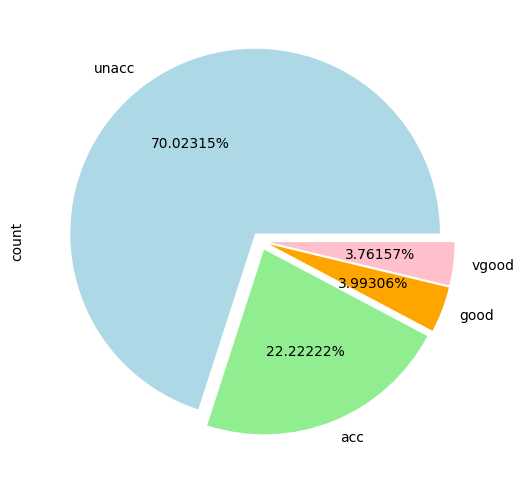

In [69]:
#데이터셋 분포 시각화
fig_size = plt.rcParams['figure.figsize']
fig_size[0] = 8
fig_size[1] = 6
plt.rcParams['figure.figsize'] = fig_size
dataset.output.value_counts().plot(kind='pie', autopct='%0.05f%%', colors=['lightblue', 'lightgreen', 'orange', 'pink'], explode=(0.05, 0.05, 0.05, 0.05))

자동차 상태 분포

unacc(허용 불가능) 70%, acc(허용 가능) 30%, vgood(아주좋은)*good(좋은) 10%

**데이터 전처리**
딥러닝은 통계 알고리즘 기반

->따라서 단어를 숫자(텐서)로 변환해야 함 : 임베딩(embedding)

주어진 데이터의 형태를 파악하고 숫자로 변형해야 함.



범주형 데이터(예제에서 다룸)의 변환

: 범주형 데이터 -> dataset[category] -> 넘파이 배열 -> 텐서


In [72]:
#예제 데이터셋 칼럼 리스트
categorical_columns = ['price', 'maint', 'doors', 'persons', 'lug_capacity', 'safety']

In [73]:
#.astype()메서드 이용해 데이터타입 문자형->정수형 변환
for category in categorical_columns :
  dataset[category] = dataset[category].astype('category')

In [74]:
print(dataset['price'])

0       vhigh
1       vhigh
2       vhigh
3       vhigh
4       vhigh
        ...  
1723      low
1724      low
1725      low
1726      low
1727      low
Name: price, Length: 1728, dtype: category
Categories (4, object): ['high', 'low', 'med', 'vhigh']


In [79]:
#.cat.codes : 헤당 카테고리의 값(values)들을 문자->숫자로 변환
price = dataset['price'].cat.codes.values
maint = dataset['maint'].cat.codes.values #유지 비용
doors = dataset['doors'].cat.codes.values
persons = dataset['persons'].cat.codes.values
lug_capacity = dataset['lug_capacity'].cat.codes.values #수하물 용량
safety = dataset['safety'].cat.codes.values

print(price)

[3 3 3 ... 1 1 1]


In [81]:
#각 카테고리와 value값들을 합침
categorical_data = np.stack( [price, maint, doors, persons, lug_capacity, safety], 1 )
categorical_data[:10]

array([[3, 3, 0, 0, 2, 1],
       [3, 3, 0, 0, 2, 2],
       [3, 3, 0, 0, 2, 0],
       [3, 3, 0, 0, 1, 1],
       [3, 3, 0, 0, 1, 2],
       [3, 3, 0, 0, 1, 0],
       [3, 3, 0, 0, 0, 1],
       [3, 3, 0, 0, 0, 2],
       [3, 3, 0, 0, 0, 0],
       [3, 3, 0, 1, 2, 1]], dtype=int8)

np.stack( [ 합칠 넘파이 객체1, 객체2, ...], axis=0(각 객체가 행으로)/1(열로) )

np.concatenate( [ 합칠 넘파이 객체1, 객체2, ...], axis=0(세로로 연결)/1(가로로 연결) )

  - np.stack() : 차원이 바뀜, 모든 넘파이 배열의 차원이 같아야 함 (겹쳐짐)
  - np.stack() : 차원 바뀌지 않음, 모든 넘파이 배열의 차원이 같지 않아도 됨 (이어붙여짐)